In [7]:
import h5py
import os
from IPython.display import display
from PIL import Image
import numpy as np
import importlib
import datasets
import models
import matplotlib.pyplot as plt

In [8]:
importlib.reload(datasets)
# input image dimensions
img_rows, img_cols = 324, 224

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = datasets.cocolike_segmentation('datasets/x2/')

print('x train shape:', x_train.shape)
print('y train shape:', y_train.shape)
print('x test shape:', x_test.shape)
print('y test shape:', y_test.shape)

x train shape: (2216, 224, 324, 1)
y train shape: (2216, 14, 20, 1)
x test shape: (554, 224, 324, 1)
y test shape: (554, 14, 20, 1)


In [9]:
importlib.reload(models)
(model, optimizer, loss, metrics) = models.vgg_segmentation(img_rows, img_cols, 1)

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 324, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 162, 16)      416       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 162, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 112, 162, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 162, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 162, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 112, 162, 16)      0     

2021-07-19 13:12:34.928869: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-19 13:12:34.987827: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.76GiB deviceMemoryBandwidth: 417.23GiB/s
2021-07-19 13:12:34.987950: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-19 13:12:34.988032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-07-19 13:12:34.988085: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic librar

In [ ]:
batch_size = 10
epochs = 10
history = model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(x_test, y_test))

model.save("trained_nodel.h5", include_optimizer=False)

2021-07-19 13:13:42.171052: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 643313664 exceeds 10% of free system memory.
2021-07-19 13:13:42.539096: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-19 13:13:42.557854: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3999980000 Hz


Epoch 1/10
222/222 [==============================] - 40s 174ms/step - loss: 99868.6406 - accuracy: 0.8644 - val_loss: 70360.7188 - val_accuracy: 0.5810
Epoch 2/10
162/222 [====================>.........] - ETA: 10s - loss: 92923.7422 - accuracy: 0.9399

[89479.7890625, 88791.4296875, 88478.9140625, 88479.3828125, 88008.0234375, 87960.734375, 87810.59375, 87780.2421875, 87709.0625, 87657.3203125]


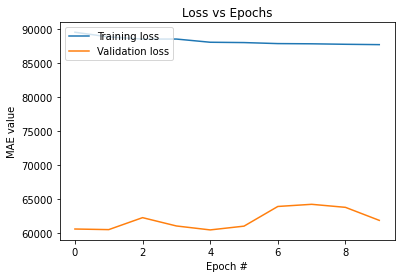

In [20]:
print(history.history['loss'])
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss vs Epochs')
plt.ylabel('MAE value')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()